In [32]:
import numpy as np
import sklearn as sk
import os
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import pandas as pd
import requests
from io import StringIO
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from statsmodels.formula.api import logit
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import ClusterCentroids
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.tree import plot_tree

#1
Inductive reasoning is typically drawing general conclusion from specific observations or patterns made. I dont remember the example we used in class but an example I found is: every quiz has been easy. therefore the test will be easy.
deductive reasoning starts with general premises accepted to be true and draws a conclusion from said premises. the most famous example and also the example we used in class is: Socrates is a man. all men are mortal. therefore, Socrates is a mortal. another example outside of that one would be everybody taking csci1070 attends SLU. I am taking csci1070. Therefore I attend SLU.

In [33]:
from ucimlrepo import fetch_ucirepo 
  
heart_disease = fetch_ucirepo(id=45) 
  
X = heart_disease.data.features 
y = heart_disease.data.targets 

print(heart_disease.metadata) 

print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [34]:
#i did look up what to do here since I wasn't too sure on how to make the mess above a readable dataframe

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

response = requests.get(url)

if response.status_code == 200:
    data = StringIO(response.text)
    
    column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                    'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 
                    'ca', 'thal', 'num']
    
    df = pd.read_csv(data, names=column_names)
    
    print(df.head())
else:
    print('Failed to fetch the dataset.')

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  


In [35]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [36]:
#looking at website where I found the data, it tells me there are missing values in the 'ca' and 'thal' columns, 
#so I figured I should replace them with the median
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [37]:
df['ca']=df['ca'].map(lambda x: 0.0 if '?' in x
                      else x)
df['ca']=df['ca'].astype(float)

In [38]:
df['ca'].value_counts()

ca
0.0    180
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [39]:
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

In [40]:
df['thal']=df['thal'].map(lambda x: 3.0 if '?' in x
                      else x)
df['thal']=df['thal'].astype(float)

In [41]:
df['thal'].value_counts()

thal
3.0    168
7.0    117
6.0     18
Name: count, dtype: int64

although I could use the standard scaler to change some of the data. I think the data benefits from being in its original form and since all the entries are numbers, I just need to make sure that all the entries are floats so calculations can be made. With this being said, I also decided it would be much easier to make calculations if I regrouped the 'num' column to where it is either detected or it isnt(no partials).

In [42]:
df = df.astype(float)

In [43]:
df['num']=df['num'].map(lambda x: 1.0 if x>.5
                      else x)

In [44]:
df['num'].value_counts()

num
0.0    164
1.0    139
Name: count, dtype: int64

In [45]:
#final df:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0


In [46]:
def train_decision_tree(df):
    X = df.drop('num', axis=1)
    y = df['num']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=32, stratify=y)
    
    model = tree.DecisionTreeClassifier(max_depth=3, random_state=32, ccp_alpha=0.006)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    return X_train, X_test, y_train, y_test, model, y_pred
    
X_train, X_test, y_train, y_test, model, y_pred = train_decision_tree(df)

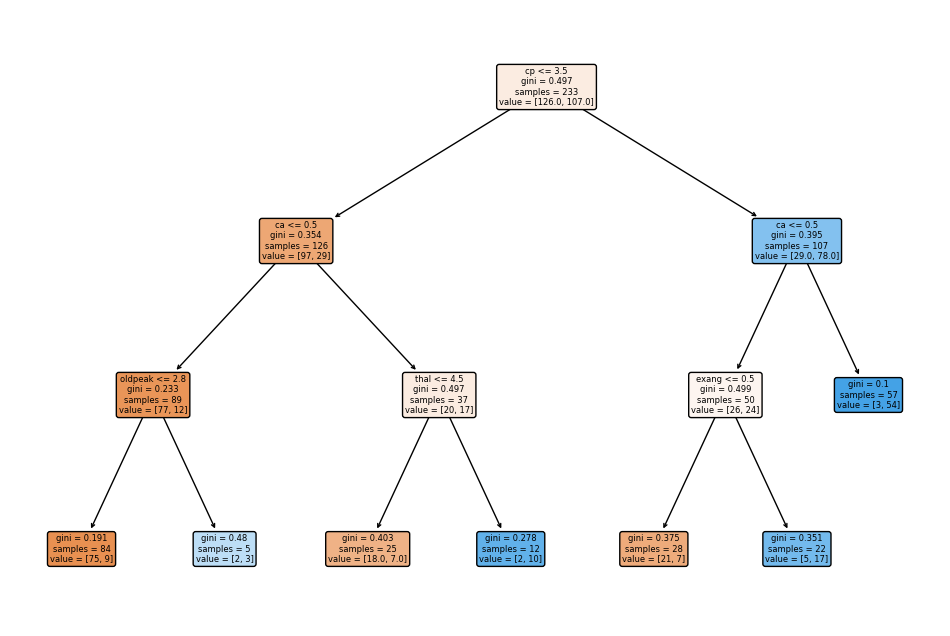

In [47]:
def plot_decision_tree(model, X, file_name='tree.svg'):
    plt.figure(figsize=(12, 8))
    tree.plot_tree(model, feature_names=list(X.columns), filled=True, fontsize=6, rounded=True)
    
    plt.savefig(file_name)
    plt.show()

plot_decision_tree(model, X)

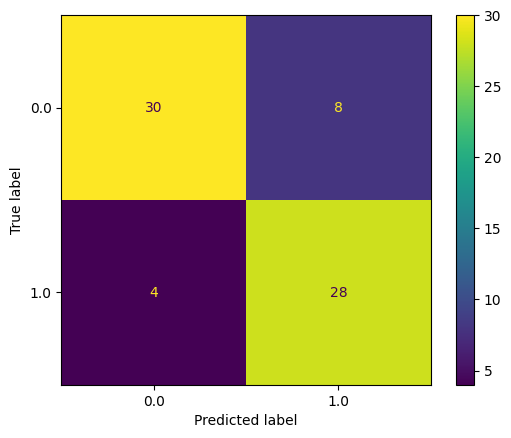

In [48]:
def train_confusion_matrix(model, X_train, y_train, X_test, y_test, random_state=32):
    ros = RandomOverSampler(random_state=random_state)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

    model.fit(X_resampled, y_resampled)

    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

train_confusion_matrix(model, X_train, y_train, X_test, y_test)

In [49]:
recall=28/32
print(recall)

0.875


Since I do no not know too much about the best techniques for tuning a tree, I decided to create a confusion matrix corresponding to the tree and tested a bunch of different numbers to see what give me the best results, with much emphasis on recall since that is typically the most important thing in medical scenarios. Additionally the tree is pretty pleasing to the eye and easy to read.

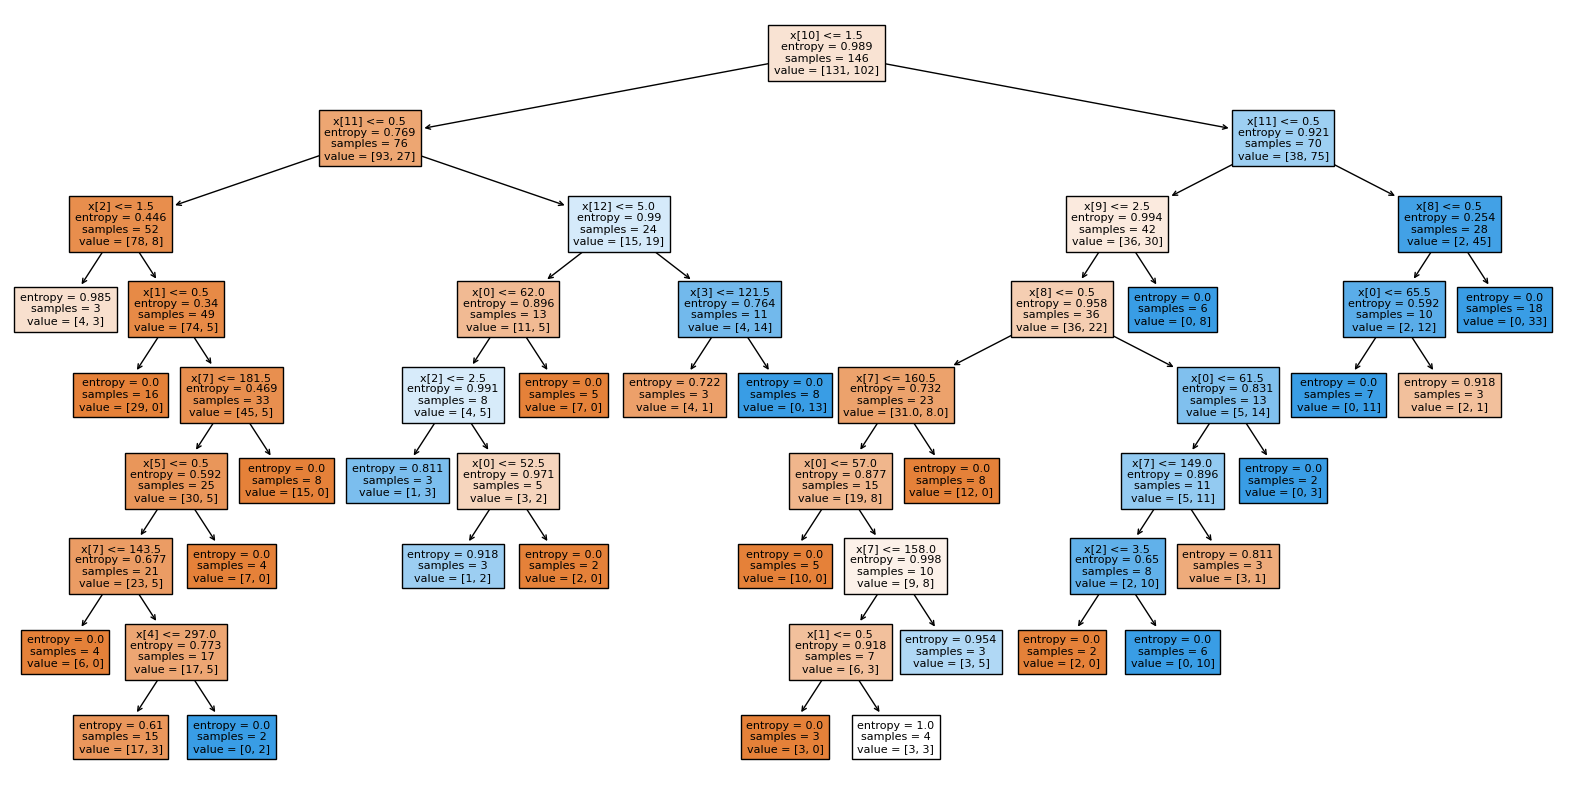

In [50]:
def train_rf_plot_tree(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=8,
                                      criterion='entropy', min_samples_leaf=2, random_state=32, tree_index=4,
                                      file_name='rf_tree.png'):
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion,
                                 min_samples_leaf=min_samples_leaf, random_state=random_state)
    rf.fit(X_train, y_train)

    tree_n = rf.estimators_[tree_index]

    plt.figure(figsize=(20, 10))
    plot_tree(tree_n, filled=True, fontsize=8)
    
    plt.savefig(file_name)
    plt.show()

train_rf_plot_tree(X_train, y_train, X_test, y_test)

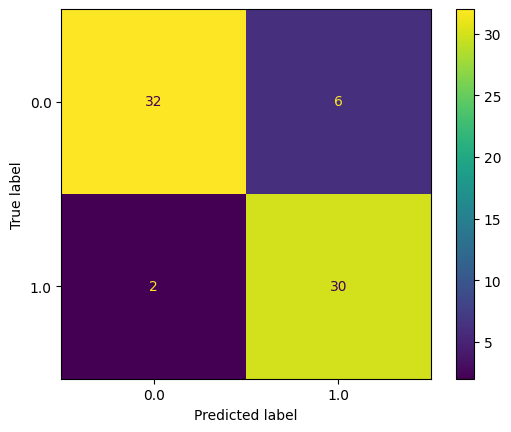

In [51]:
rf = RandomForestClassifier(n_estimators=100, max_depth=8, criterion='entropy', min_samples_leaf=2, random_state=32)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [52]:
recall=30/32
print(recall)

0.9375


Similar to what I did for the tree, I tuned my random forest by testing a bunch of different entries and seeing how they affected the confusion matrix with emphasis on reccall. This was the best reuslt I got. You will notice that as a whole the random forest confusion matrix is more reliable than the tree confusion matrix as it has highes accuracy, precision, and recall scores.

In [53]:
def train_xgboost(X_train, y_train, X_test):
    xgb = XGBClassifier(n_estimators=33, max_depth=10)
    xgb.fit(X_train, y_train)

    y_pred = xgb.predict(X_test)
    
    return y_pred

y_pred = train_xgboost(X_train, y_train, X_test)

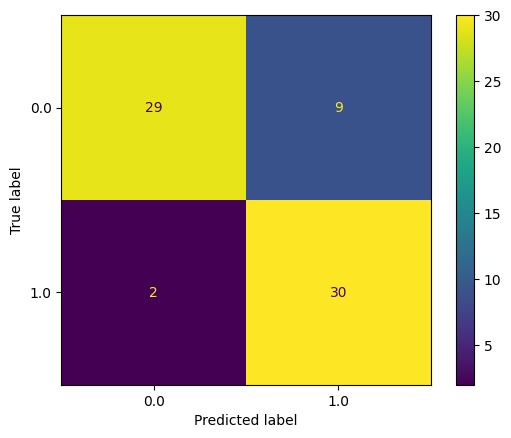

In [54]:
xgb = XGBClassifier(n_estimators=33, max_depth=10)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [55]:
recall=30/32
print(recall)

0.9375


I was having a bit of trouble with tuning the xgb boost as I am having a bit of trouble finding what all we can change, but I was still able to get a pretty good confusion matrix. It has the same recall as the random forest model and better recall than the tree model. However, it falls in comparison to the random forest model overall.